In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import FinanceDataReader as fdr

In [4]:
import koreanize_matplotlib

In [5]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', None) #None으로 설정하면 모든 행 출력

#### 
KOSPI, KOSDAQ, ETF의 시총, 변동성, 수익률, 편차, 거래량 등을 비교 및 시각화하여 세 시장의 특성을 제공

In [6]:
# ETF 전 종목
# etfs = fdr.StockListing('ETF/KR')

# 코스피 전종목
# stocks = fdr.StockListing('KOSPI')

# 코스닥 전 종목
# stocks = fdr.StockListing('KOSDAQ')



In [14]:
kospi = fdr.StockListing('KOSPI')
kosdaq = fdr.StockListing('KOSDAQ')
etfs = fdr.StockListing('ETF/KR')

In [16]:
etfs.head(1)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1057920,2,95,0.01,1057938.0,0.847,211396,223639,94381


In [17]:
# 시가총액 평균, 시가총액 총합, 

kospi_total_marcap = kospi['Marcap'].sum()
kosdaq_total_marcap = kosdaq['Marcap'].sum()
etfs_total_marcap = etfs['MarCap'].sum()

In [19]:
print(kospi_total_marcap)
print(kosdaq_total_marcap)
print(etfs_total_marcap)

1997825853682133
341005131321276
1723855


In [22]:
marcaps = {
  'KOSPI': kospi_total_marcap,
  'KOSDAQ': kosdaq_total_marcap,
  'ETF': etfs_total_marcap
}

In [28]:
marcaps_df = pd.DataFrame(list(marcaps.items()), columns=['Market', 'Total MarCap'])

In [29]:
marcaps_df

,Market,Total MarCap
0,KOSPI,1997825853682133
1,KOSDAQ,341005131321276
2,ETF,1723855


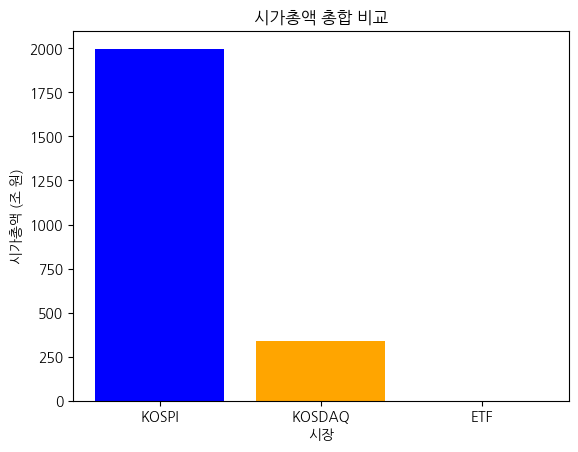

In [23]:
plt.bar(marcaps.keys(),[cap / 1e12 for cap in marcaps.values()], color=['blue', 'orange', 'green'])
plt.title('시가총액 총합 비교')
plt.ylabel('시가총액 (조 원)')
plt.xlabel('시장')
plt.xticks(rotation=0)
plt.show()

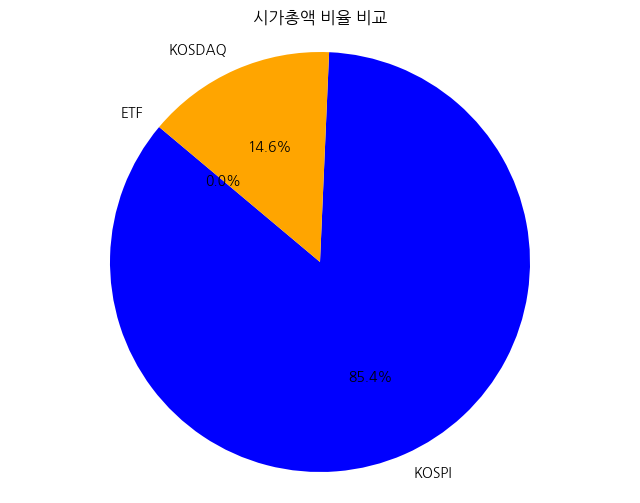

In [26]:
labels = marcaps.keys()
sizes = [cap / 1e12 for cap in marcaps.values()]  # 조 원 단위로 변환
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('시가총액 비율 비교')
plt.axis('equal')  # 원형으로 유지
plt.show()